Import packages and load image

In [7]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans

Preprocess image

The original image


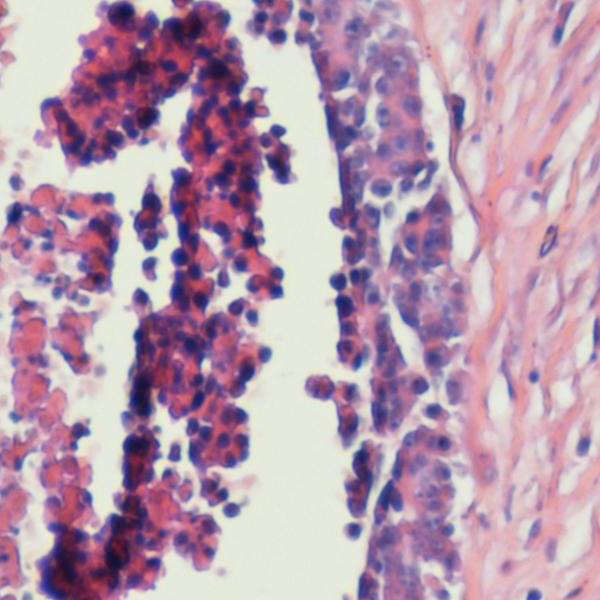



HSV converted image


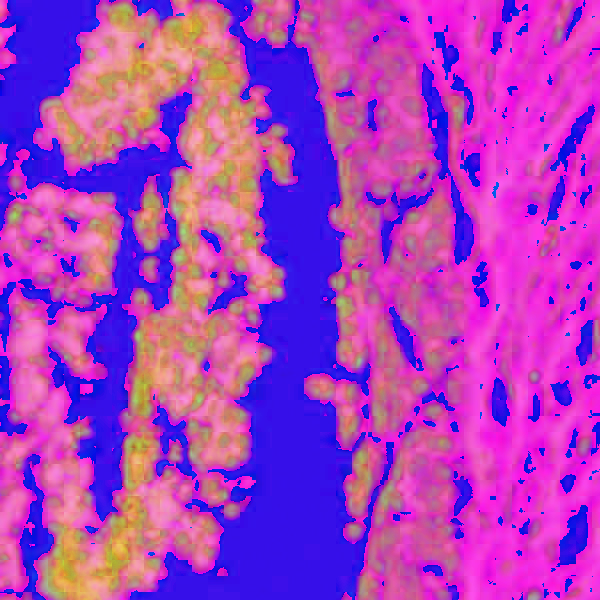

In [28]:
print("The original image")
rgb_image = np.array(Image.open("sample.jpg"))
display(Image.fromarray(rgb_image))

print('\n\nHSV converted image')
hsv_image = np.array(Image.open("sample.jpg").convert("HSV"))
display(Image.fromarray(hsv_image))

# Vectorized image
image = rgb_image.reshape((-1,3))

***K***-means algorithm

In [4]:
# Reshape it to be 2-dimension
k_image = image.reshape(image.shape[0] * image.shape[1], image.shape[2])
km = KMeans(n_clusters=2, random_state=0)
km.fit(k_image)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Agglomerative hierarchical clustering algorithm

Spectral clustering algorithm 